The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D


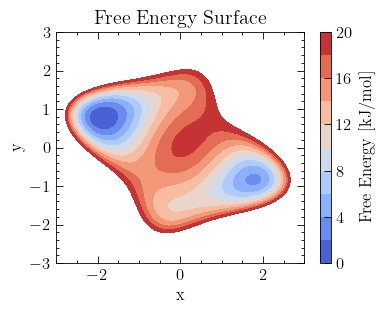

/home/ucecabj/Desktop/MFI_git/MFI_class2D


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
from importlib import reload

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

import MFI_lib2D as lib2
import MFI_class2D

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})

grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.contourf(X, Y, inve_pot, levels=np.linspace(0, 20, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

!pwd

### New Surface with 1 periodic CV and 1 non-periodic-CV

In [58]:
xmin = - np.pi
xmax = np.pi

ymin = 0
ymax = 100

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x, y)


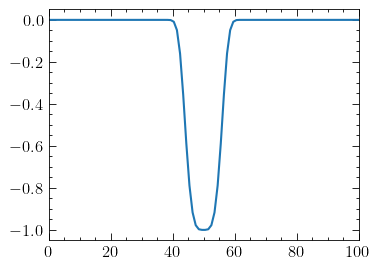

In [57]:
zz =  (np.zeros_like(y) 
       #+ np.exp(-y + 5) + np.exp(y - 95) \
        - np.exp( -0.5 * (y - 50)**4 / 30**2 )

)

plt.plot(y, zz)
plt.xlim(ymin, ymax)
plt.show()


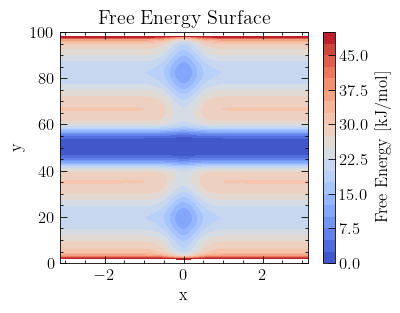

ready to show


In [206]:
Z = (np.zeros_like(X)
     +  5 * np.sin(0.2*Y + 0.8) 
     - 20 * np.exp(-0.6 * (Y-50)**4 / 50**2)
     - 10 * np.exp(-0.5 * (10*X**2 + 0.00002 * (Y-50)**2))
     + 10 * np.exp(-0.5 * (10*X**2 + 0.01 * (Y-50)**2) )
     
     + np.exp(-Y + 5) + np.exp(Y - 95) 
     )
Z = Z - np.min(Z)

plt.contourf(X, Y, Z, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

lib2.plot_3D_plotly(X, Y, Z, 0, 100, title="Complex surface", opacity=0.8)

### New Surface with multiple Minima

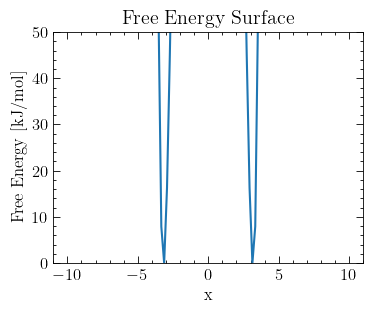

In [221]:
grid = np.linspace(-10,10,100)
# grid = np.linspace(-3,3,100)
a = 0.5
b = 3
c = 1
d = 0.2

# y = d*(a*grid**8 - b*grid**6 + c*grid**4)
# y = 10*(0.05*grid**12 - 1*grid**4 + 1.2*grid**2)
y = - 13*grid**4 + 48*grid**2 + 0.7*grid**6
y = y - np.min(y)

plt.plot(grid, y); 

plt.ylim(0, 50);
# plt.xlim(-3, 3);
plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()


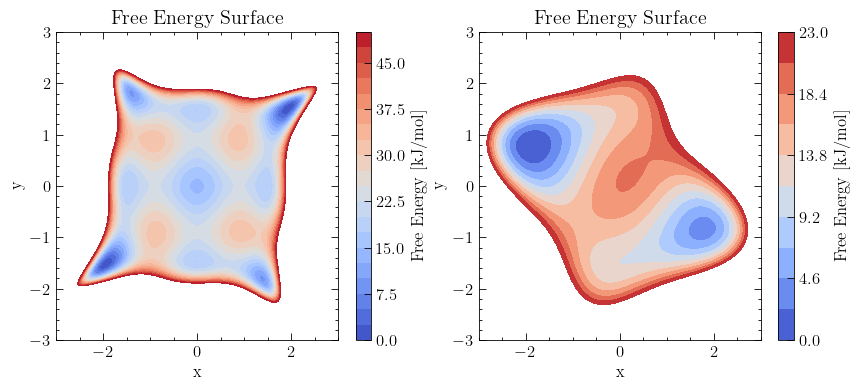

In [709]:
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
plt.figure(figsize=(10, 4))

ab_pot = 2*(2.3*(X**6 + Y**6) - 10.2*(X**4 + Y**4) + 12*(Y**2 + X**2) )
# ab_pot = 2.3*X**6 + 2.3*Y**6 - 10.2*(X**4 + Y**4) + 12*(Y**2 + X**2) )

ab_pot += 1*(-1*X**3*Y + 1*X*Y**3)  # rotational effect
ab_pot +=  1*X**2*Y**2 
ab_pot +=  + 3*X*Y  # deepend (+x) diagonal along y=x
ab_pot += 1*X  # deepend (+x) lower x-valies
ab_pot +=  5*Y  # deepend (+y) lower y-valies

ab_pot = 4.6*(X**6 + Y**6) - 20.4*(X**4 + Y**4) + 24*(Y**2 + X**2) 
# ab_pot += -8*(-1*X**3*Y + 1*X*Y**3)  # rotational effect


# ab_pot = 5.7*X**6 + 4.2*Y**6 - 20.4*X**4 - 20.5*Y**4 + 24.3*Y**2 + 24*X**2 

ab_pot += -1.6*X**5*Y**3 + 1.52*X**3*Y**5  # rotational effect
# ab_pot += -3*X**3*Y + 2*X*Y**3  # rotational effect
# ab_pot += 4*X**2*Y**2
# ab_pot += 1*X**2
# ab_pot += 1*X*Y  # deepend (+x) diagonal along y=x
# ab_pot += 1*X  # deepend (+x) lower x-valies
# ab_pot +=  5*Y  # deepend (+y) lower y-valies

ab_pot = ab_pot - np.min(ab_pot)
plt.subplot(1,2,1); plt.contourf(X, Y, ab_pot, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface")

# inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = + 1.34549*X**4 + 1.34549*Y**4 - 6.44246*X**2 - 5.55754*Y**2 \
        + 1.90211*X**3*Y - 1.90211*X*Y**3 \
        + 3.92705*X**2*Y**2 \
        + 5.58721*X*Y \
        + 0.904586*Y + 1.33481*X + 18.5598
        
# inve_pot = + 1*X**4 + 1*Y**4 - 6*X**2 - 6*Y**2 \
#         + 2*X**3*Y - 2*X*Y**3 \
#         + 4*X**2*Y**2 \
#         # + 6*X*Y \
        # + 1*Y + 1*X + 18.5598
        
inve_pot = inve_pot - np.min(inve_pot)
plt.subplot(1,2,2); plt.contourf(X, Y, inve_pot, levels=np.linspace(0, 23, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()


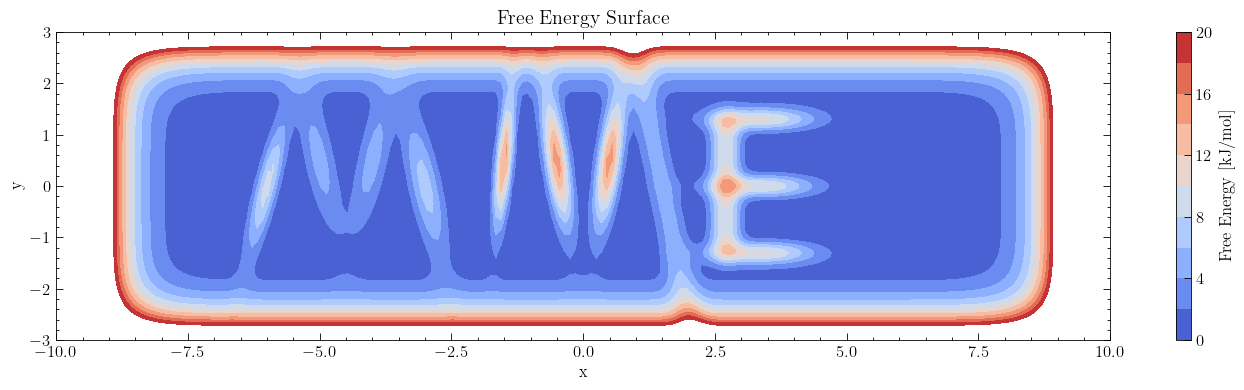

In [418]:
gridx = np.linspace(-10, 10, 200); 
gridy = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(gridx, gridy)


# define functioin to create a 2D gaussians
def gaus2d(x=X, y=Y, x0=0, y0=0, xs=0.5, ys=0.5, A=1): return A * np.exp(-((x-x0)**2/(2*xs**2) + (y-y0)**2/(2*ys**2)))

# define function to create a 2D gaussian with covariance
def gaus2d(x=X, y=Y, x0=0, y0=0, xs=0.5, ys=0.5, A=1, cov=0): return A * np.exp(-((x-x0)**2/(2*xs**2) + (y-y0)**2/(2*ys**2) + cov*(x-x0)*(y-y0)))

ab_pot2 = 2E-18*X**20 + 0.05*Y**6

# ab_pot2 += gaus2d(A=5, xs=0.2, ys=0.5, cov=-10)


ab_pot2 += gaus2d(A=3, x0=-6, y0=0, xs=0.2, ys=0.7, cov=-6)**2
ab_pot2 += gaus2d(A=5, x0=-5, y0=0.5, xs=0.2, ys=0.7, cov=5)
ab_pot2 += gaus2d(A=5, x0=-4, y0=0.5, xs=0.2, ys=0.7, cov=-5)
ab_pot2 += gaus2d(A=7, x0=-3, y0=0, xs=0.2, ys=0.7, cov=5)

ab_pot2 += gaus2d(A=15, x0=-1.5, y0=0.5, xs=0.1, ys=0.7, cov=-9)
ab_pot2 += gaus2d(A=15, x0=-0.5, y0=0.5, xs=0.15, ys=0.7, cov=6)
ab_pot2 += gaus2d(A=15, x0=0.5, y0=0.5, xs=0.15, ys=0.7, cov=-6)
ab_pot2 += gaus2d(A=5, x0=1.5, y0=0, xs=0.2, ys=1, cov=5)

# ab_pot2 += gaus2d(A=40, x0=2.5, y0=0, xs=0.2, ys=1, cov=0)**0.5
ab_pot2 += 10 * np.exp(-((X-2.7)**2/(2*0.2**2) + (Y-0)**8/(2*3**2)))

ab_pot2 += gaus2d(A=10, x0=3.4, y0=1.3 , xs=0.7, ys=0.15, cov=0)
ab_pot2 += gaus2d(A=10, x0=3.4, y0=0   , xs=0.7, ys=0.15, cov=0)
ab_pot2 += gaus2d(A=10, x0=3.4, y0=-1.3, xs=0.7, ys=0.15, cov=0)



# ab_pot2 += gaus2d(A=5, xs=0.2, ys=0.5, cov=10)


ab_pot2 = ab_pot2 - np.min(ab_pot2)

plt.figure(figsize=(17, 4))
plt.contourf(X, Y, ab_pot2, levels=np.linspace(0, 20, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()
